<a href="https://colab.research.google.com/github/myller-silva/SO-trabalho-03-paginacao/blob/main/evaluate_aging_algorithm_with_varying_bits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [1]:
from collections import deque
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Algoritmos

In [2]:
def fifo(referencias_as_paginas, qtd_molduras):
  molduras = []
  faltas_de_pagina = 0

  for pagina in referencias_as_paginas:
    if pagina not in molduras:
      faltas_de_pagina += 1
      if len(molduras) == qtd_molduras:
        molduras.pop(0)
      molduras.append(pagina)

  return faltas_de_pagina


def aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits=None):
    if qtd_bits is None:
      qtd_bits = qtd_molduras
    molduras = []
    idade_paginas = []
    faltas_de_pagina = 0

    for pagina in referencias_as_paginas:
        if pagina in molduras:
            indice_pagina = molduras.index(pagina)
            idade_paginas[indice_pagina] >>= 1
            idade_paginas[indice_pagina] |= 1 << (qtd_bits - 1)
        else:
            faltas_de_pagina += 1
            idade_paginas = [idade >> 1 for idade in idade_paginas]
            if len(molduras) == qtd_molduras:
                indice_pagina_a_remover = idade_paginas.index(min(idade_paginas))
                molduras[indice_pagina_a_remover] = pagina
                idade_paginas[indice_pagina_a_remover] = 1 << (qtd_bits - 1)
            else:
                molduras.append(pagina)
                idade_paginas.append(1 << (qtd_bits - 1))
    return faltas_de_pagina


# FIFO vs Aging

In [3]:
def experimento_fifo_vs_aging(qtd_referencias, qtd_paginas, max_molduras = 64):
    paginas  = [i for i in range(qtd_paginas)]
    referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
    # tamanho_molduras = [2**i for i in range( int(math.log2(max_molduras)) + 1) ] # se max_molduras == 16, entao [2^0, 2^1 , 2^2, 2^3]
    tamanho_molduras = [i for i in range(1, max_molduras+1)]
    fifo_acumulate = []
    aging_acumulate = []
    # print('molduras: ', tamanho_molduras)

    for tamanho_moldura in tamanho_molduras:
        fifo_acumulate.append(fifo(referencias_as_paginas, tamanho_moldura))
        aging_acumulate.append(aging_bits(referencias_as_paginas, tamanho_moldura))

    return fifo_acumulate, aging_acumulate, tamanho_molduras


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[983, 964, 949, 937, 918, 894, 874, 862, 850, 846, 823, 798, 784, 777, 762, 748, 734, 716, 691, 676, 660, 635, 622, 612, 602, 585, 577, 560, 552, 541, 516, 488]
[983, 964, 950, 937, 915, 894, 878, 858, 849, 841, 827, 808, 784, 766, 753, 735, 721, 707, 692, 673, 658, 637, 624, 611, 597, 583, 569, 551, 539, 523, 504, 492]


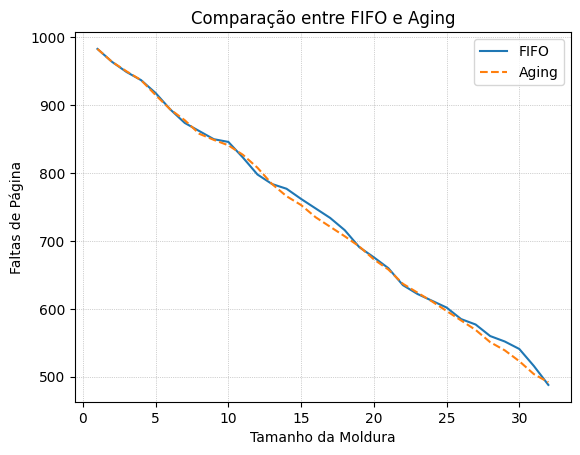

In [18]:
fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = 1000, qtd_paginas = 64, max_molduras=32)
print(tamanho_molduras)
print(fifo_array)
print(aging_array)

# plotagem
plt.plot(tamanho_molduras, fifo_array, label='FIFO')
plt.plot(tamanho_molduras, aging_array, label='Aging', linestyle='--')
plt.grid(True, linestyle=':', color='gray', alpha=0.7, linewidth=0.5)
plt.xlabel('Tamanho da Moldura')
# plt.xticks(tamanho_molduras)
plt.ylabel('Faltas de Página')
plt.title('Comparação entre FIFO e Aging')
plt.legend()
plt.show()


# Gráfico Médio


In [5]:
num_experiements = 100
qtd_paginas = 64
qtd_referencias = 1000
max_molduras = 32

paginas = np.arange(qtd_paginas)
m_r_fifo = np.zeros((num_experiements, max_molduras))
m_r_aging = np.zeros((num_experiements, max_molduras))

for i in range(num_experiements):
    print(f"\ri: {i}", end='')
    referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
    for j in range(1, max_molduras+1):
        fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = qtd_referencias, qtd_paginas = qtd_paginas, max_molduras=max_molduras)
        m_r_fifo[i, j-1] = fifo_array[j-1]
        m_r_aging[i, j-1] = aging_array[j-1]



i: 99

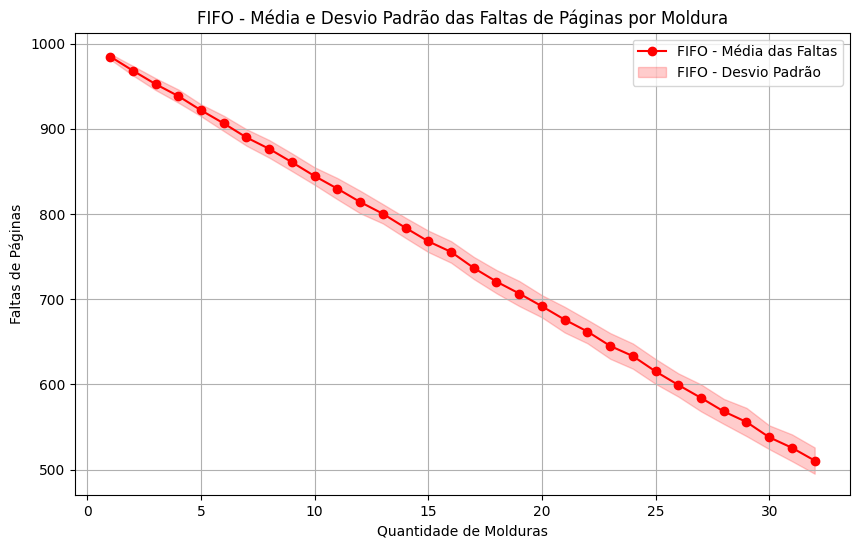

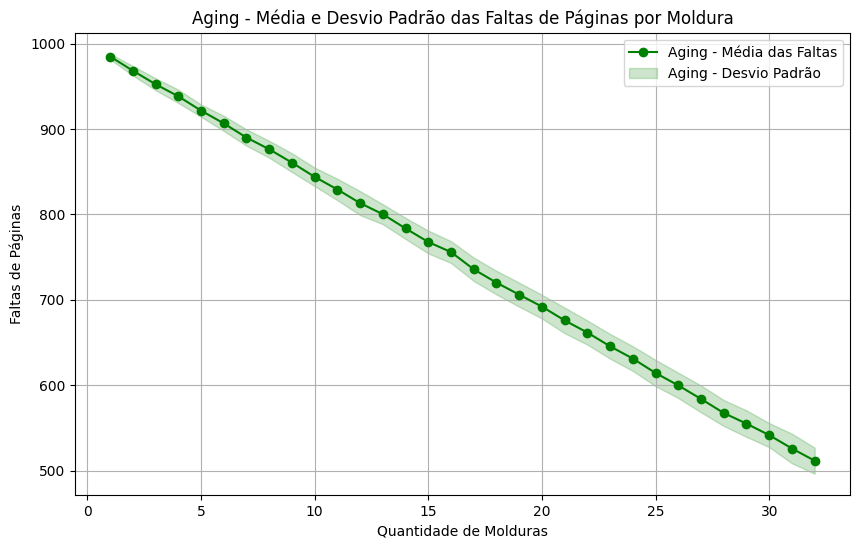

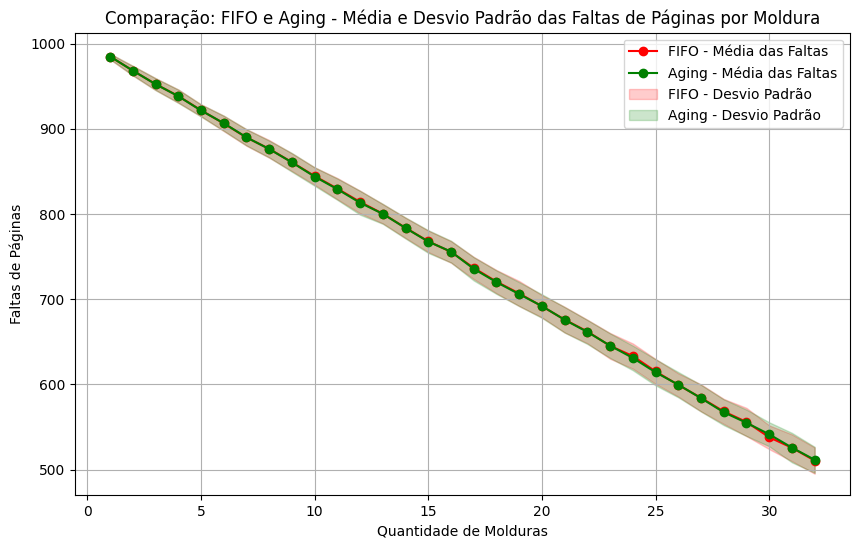

In [6]:
# Calcular as médias e desvios padrão
fifo_cor = "red"
aging_cor = "green"

medias_fifo = np.mean(m_r_fifo, axis=0)
desvios_padrao_fifo = np.std(m_r_fifo, axis=0)

medias_aging = np.mean(m_r_aging, axis=0)
desvios_padrao_aging = np.std(m_r_aging, axis=0)

# Quantidade de molduras
molduras = np.arange(1, max_molduras + 1)

# 1. Gráfico separado para FIFO
plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo, marker='o', color=fifo_cor, label='FIFO - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.title('FIFO - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 2. Gráfico separado para Aging
plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_aging, marker='o', color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 3. Gráfico combinando FIFO e Aging
plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo, marker='o', color=fifo_cor, label='FIFO - Média das Faltas')
plt.plot(molduras, medias_aging, marker='o', color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Comparação: FIFO e Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# Aging com tamanho de contadores com bits diferents usando as mesmas referências

In [7]:
def evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range):
    resultados = []
    for qtd_bits in bits_range:
        faltas = aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits)
        resultados.append(faltas)
    return resultados


In [8]:
qtd_referencias = 1000
qtd_paginas = 64
qtd_molduras = 32
max_bits = 64

bits_range = [i for i in range(2, max_bits)]
paginas = [i for i in range(qtd_paginas)]

referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
resultados = evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range)

In [21]:
print(dict(zip(bits_range, resultados)))

{2: 505, 3: 505, 4: 495, 5: 515, 6: 514, 7: 523, 8: 511, 9: 510, 10: 498, 11: 515, 12: 504, 13: 518, 14: 504, 15: 508, 16: 501, 17: 511, 18: 509, 19: 514, 20: 519, 21: 519, 22: 523, 23: 523, 24: 523, 25: 522, 26: 520, 27: 523, 28: 523, 29: 523, 30: 524, 31: 525, 32: 525, 33: 524, 34: 524, 35: 524, 36: 524, 37: 524, 38: 524, 39: 523, 40: 523, 41: 523, 42: 523, 43: 523, 44: 523, 45: 523, 46: 523, 47: 523, 48: 523, 49: 523, 50: 523, 51: 523, 52: 523, 53: 523, 54: 523, 55: 523, 56: 523, 57: 523, 58: 523, 59: 523, 60: 523, 61: 523, 62: 523, 63: 523}


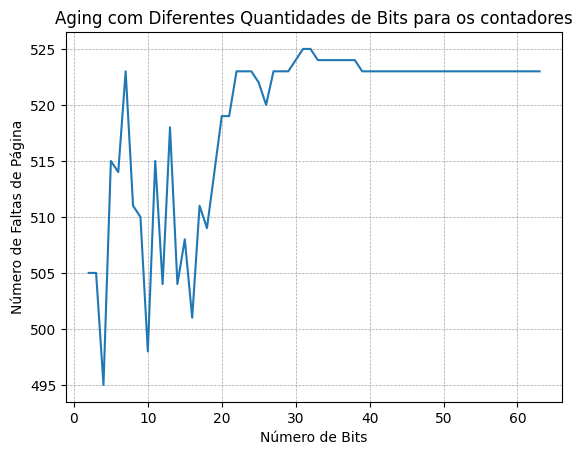

In [19]:
plt.plot(
    bits_range,
    resultados,
    # marker='o'
    )
plt.xlabel('Número de Bits')
plt.ylabel('Número de Faltas de Página')
plt.title('Aging com Diferentes Quantidades de Bits para os contadores')
plt.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.5)
plt.show()